In [25]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

#Create SQLAlchemy engine to connect to SQLite database
engine = create_engine("sqlite:///open_university_small.sqlite")
engine1 = create_engine("sqlite:///open_university.sqlite")

In [26]:
#Query to select data from 'studentInfo' table
query = "SELECT * FROM studentInfo"
query1 = "SELECT * FROM studentRegistration"
query2 = "SELECT * FROM studentAssessment"
query3 = "SELECT * FROM studentVle"

#Read data from 'studentInfo' table in dataframe
df = pd.read_sql_query(query, engine)
df_reg = pd.read_sql_query(query1, engine)
df_asses = pd.read_sql_query(query2, engine)
df_click = pd.read_sql_query(query3, engine1)


#Close SQLAlchemy engine
engine.dispose()
engine1.dispose()

In [27]:
#create new assessments dataframe with rows that have 'date_submitted" less than 91
df_asses1 = df_asses[df_asses['date_submitted'] < 91]
df_asses1.describe()

,index,id_assessment,id_student,date_submitted,is_banked,score
count,71051.000000,71051.000000,7.105100e+04,71051.000000,71051.000000,70991.000000
mean,78970.332085,25665.434533,7.098851e+05,42.953864,0.026868,76.550027
std,45710.767188,8451.721443,5.649305e+05,23.796862,0.161699,18.902731
min,0.000000,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,40428.500000,15020.000000,4.985800e+05,21.000000,0.000000,67.000000
50%,77885.000000,25349.000000,5.815740e+05,45.000000,0.000000,80.000000
75%,116555.500000,34873.000000,6.343490e+05,60.000000,0.000000,90.000000
max,173239.000000,37442.000000,2.698588e+06,90.000000,1.000000,100.000000


In [28]:
#create a new dataframe that groups the data by 'id_student' and sums 'score'
df_asses2 = df_asses1.groupby('id_student')['score'].sum().reset_index()
df_asses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23271 entries, 0 to 23270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  23271 non-null  int64  
 1   score       23271 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 363.7 KB


In [29]:
#create new click dataframe with rows that have 'date' less than 261
df_click1 = df_click[df_click['date'] < 261]
df_click1.describe()

,index,id_student,id_site,date,sum_click
count,1.064176e+07,1.064176e+07,1.064176e+07,1.064176e+07,1.064176e+07
mean,5.327445e+06,7.333192e+05,7.382550e+05,9.495913e+01,3.719232e+00
std,3.075348e+06,5.827034e+05,1.312215e+05,7.588017e+01,8.853162e+00
min,0.000000e+00,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,2.663547e+06,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.327396e+06,5.882330e+05,7.300680e+05,8.600000e+01,2.000000e+00
75%,7.989792e+06,6.464820e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,1.065508e+07,2.698588e+06,1.049562e+06,2.600000e+02,6.977000e+03


In [30]:
#create a new dataframe that groups the data by 'id_student' and sums 'sum_click'
df_click2 = df_click1.groupby('id_student')['sum_click'].sum().reset_index()
df_click2.head()


,id_student,sum_click
0,6516,2789
1,8462,656
2,11391,934
3,23629,161
4,23698,910


In [31]:
#merge df_asses2 and df_click2 dataframes on 'id_student'
df_merge_click_asses = pd.merge(df_asses2, df_click2, on='id_student', how='inner')
df_merge_click_asses.head()

,id_student,score,sum_click
0,6516,108.0,2789
1,8462,609.0,656
2,11391,163.0,934
3,23629,230.0,161
4,23698,265.0,910


In [32]:
#merge df and df_reg on 'id_student' column
merge_df = pd.merge(df, df_reg, on='id_student')
merge_df.head()

,index_x,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,AAA,2013J,-159.0,NaN
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,AAA,2013J,-53.0,NaN
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2,AAA,2013J,-92.0,12.0
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3,AAA,2013J,-52.0,NaN
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,4,AAA,2013J,-176.0,NaN


In [33]:
#merge df_merge_click_asses and merge_df on 'id_student' column
final_merge = pd.merge(df_merge_click_asses, merge_df, on='id_student')
final_merge.head()

,id_student,score,sum_click,index_x,code_module_x,code_presentation_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,6516,108.0,2789,383,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,383,AAA,2014J,-52.0,NaN
1,8462,609.0,656,14395,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,14395,DDD,2013J,-137.0,119.0
2,8462,609.0,656,14395,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,17560,DDD,2014J,-38.0,18.0
3,8462,609.0,656,17560,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,14395,DDD,2013J,-137.0,119.0
4,8462,609.0,656,17560,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,17560,DDD,2014J,-38.0,18.0


In [34]:
#create new dataframe with relevant columns
demo_df = final_merge[['score','sum_click','date_registration','code_module_x', 'region', 'highest_education', 'imd_band', 'age_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']]
demo_df.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,2789,-52.0,AAA,Scotland,HE Qualification,80-90%,55<=,M,0,60,N,Pass
1,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Withdrawn
2,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Withdrawn
3,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Withdrawn
4,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Withdrawn


In [35]:
#remove rows with null values
demo_df.dropna()
demo_df.isnull().sum()

score                      0
sum_click                  0
date_registration         18
code_module_x              0
region                     0
highest_education          0
imd_band                1286
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [36]:
#remove rows with null values
demo_df = demo_df.dropna()

In [37]:
#convert final_result to numerical data. 1 = Distinction or Pass, 0 = Fail or Withdrawn
demo_df_n=demo_df.replace(['Pass', 'Withdrawn', 'Fail', 'Distinction'], ['Pass', 'Fail', 'Fail', 'Pass'])
demo_df_n.head()

,score,sum_click,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,108.0,2789,-52.0,AAA,Scotland,HE Qualification,80-90%,55<=,M,0,60,N,Pass
1,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Fail
2,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,0,90,N,Fail
3,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Fail
4,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55<=,M,1,60,N,Fail


In [38]:
#convert 55<= age_band values to 55
demo_df_n['age_band'] = demo_df_n['age_band'].replace('55<=', '55')
demo_df_n['age_band'].unique()

array(['55', '0-35', '35-55'], dtype=object)

In [39]:
#replace 10-20 in 'imd_band' to 10-20%
demo_df_n['imd_band'] = demo_df_n['imd_band'].replace('10-20', '10-20%')
#check if the change has been made
demo_df_n['imd_band'].unique()

array(['80-90%', '30-40%', '90-100%', '20-30%', '50-60%', '10-20%',
       '40-50%', '60-70%', '70-80%', '0-10%'], dtype=object)

In [40]:
#rename column headers
demo_df_n.columns = ['Score', 'Clicks', 'Registration Date', 'Module', 'Region', 'Highest Education', 'IMD Band', 'Age Band', 'Gender', 'Number of Previous Attempts', 'Studied Credits', 'Disability', 'Final Result']
demo_df_n.head()

,Score,Clicks,Registration Date,Module,Region,Highest Education,IMD Band,Age Band,Gender,Number of Previous Attempts,Studied Credits,Disability,Final Result
0,108.0,2789,-52.0,AAA,Scotland,HE Qualification,80-90%,55,M,0,60,N,Pass
1,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55,M,0,90,N,Fail
2,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55,M,0,90,N,Fail
3,609.0,656,-137.0,DDD,London Region,HE Qualification,30-40%,55,M,1,60,N,Fail
4,609.0,656,-38.0,DDD,London Region,HE Qualification,30-40%,55,M,1,60,N,Fail


In [41]:
#export dataframe to pickle file
demo_df_n.to_pickle('import_df.pkl')

MODELS

In [42]:
#Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


random forest

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3104,701
Actual 1,550,3792


Accuracy Score : 0.8464465447403953
Classification Report
              precision    recall  f1-score   support

        Fail       0.85      0.82      0.83      3805
        Pass       0.84      0.87      0.86      4342

    accuracy                           0.85      8147
   macro avg       0.85      0.84      0.85      8147
weighted avg       0.85      0.85      0.85      8147



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

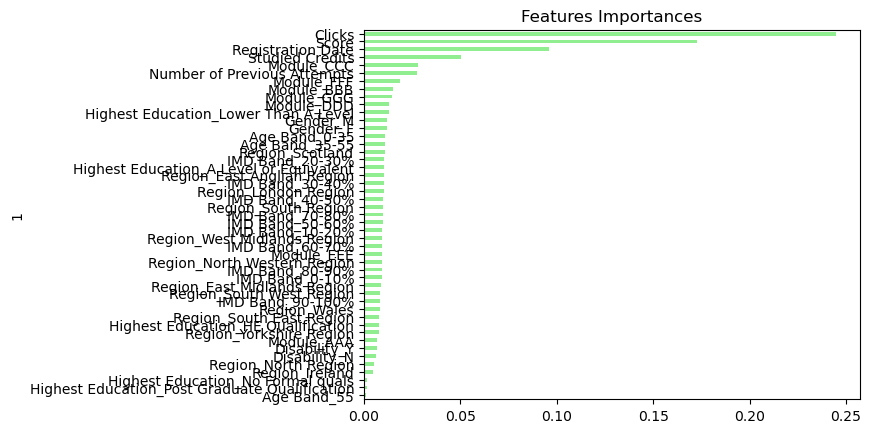

In [44]:
# Define features set
X = demo_df_n.copy()
X.drop("Final Result", axis=1, inplace=True)

#Encode the categorical data 
X = pd.get_dummies(X)

# Define target vector
y = demo_df_n["Final Result"].ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

export model to app

In [55]:

#copy dataframe and define target and encoding features 
df = demo_df_n.copy()
target = df["Final Result"]
encode = ['Module', 'Region', 'Highest Education', 'IMD Band', 'Age Band', 'Gender', 'Disability']

#encode the data
for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy], axis=1)
    del df[col]

target_mapper = {'Pass': 1, 'Fail': 0}
def target_encode(val):
    return target_mapper[val]

df['Final Result'] = df['Final Result'].apply(target_encode)

# separate the features and target
X = df.drop('Final Result', axis=1)
y = df['Final Result']

#build the model
model = RandomForestClassifier()
model.fit(X, y)

#save model
import pickle
pickle.dump(model, open('rf_model.pkl', 'wb'))